# CHIP SEQ ANALYSIS REPORT

## Introduction

This report presents a comprehensive analysis of sequencing data, including quality control, peak calling, motif analysis, and gene enrichment analysis. Our goal is to assess the quality of the sequencing reads, alignment, and to identify functional elements associated with the factor of interest.

### Quality Control of Sequencing Reads
Based on the FastQC reports these are some points: 

-- Quality of Sequencing Reads:
 
1. Basic Statistics: All files show a descent number of total bases (ranging from 825.3 Mbp to 1.4 Gbp) and sequence lengths (40-45 bp), which are feasible for further high throughput sequencing.

2. Quality Scores: The per base sequence quality reports showing high quality across all bases, with most bases having quality scores well above 28, which indicates a very good quality.
3. Sequence Content and GC Content: There were no flags for sequence content or GC content, suggesting that the base composition is as expected.

-- Concerning Aspects:
1. Per Tile Sequence Quality: IP_rep1 shows a warning for per tile sequence quality which suggests that there might be some inconsistency in the quality of sequences produced across different tiles of the flow cell, which could indicate technical issues during sequencing.
   
2. Overrepresented Sequences and Adapter Content: There were no concerns about overrepresented sequences or adapter content in the reports, indicating efficient library preparation and minimal contamination.

### Alignment Concerns:
- The alignment percentage are pretty good  in CTL_rep1 Out of 35,912,147 total reads, 34,170,498 (95.15%) were successfully mapped,in CTL_rep2 26,375,810 out of 27,47,3133 mapped(96.01%), IP_rep1 15,076,898 out of 15,928,815 mapped(94.65%), CTL_rep2 25,022,065 out of 25,622,968 mapped(97.65%).Hence no alignment concerns.

### Decision on Sample Exclusion:
- Given that only IP_rep1 shows a warning for per tile sequence quality,it can be consider excluding this sample. But since all the other quality metrics for the IP_rep1 sample, such as per base sequence quality, sequence length distribution, and GC content, do not show any flags or concerns. This suggests that despite potential issues in some tiles, the overall quality of the data might still be adequate for further analyses.And upon further analyisis the IP_rep1 gives pretty good results hence not excluded from the analysis.


# Heatmap

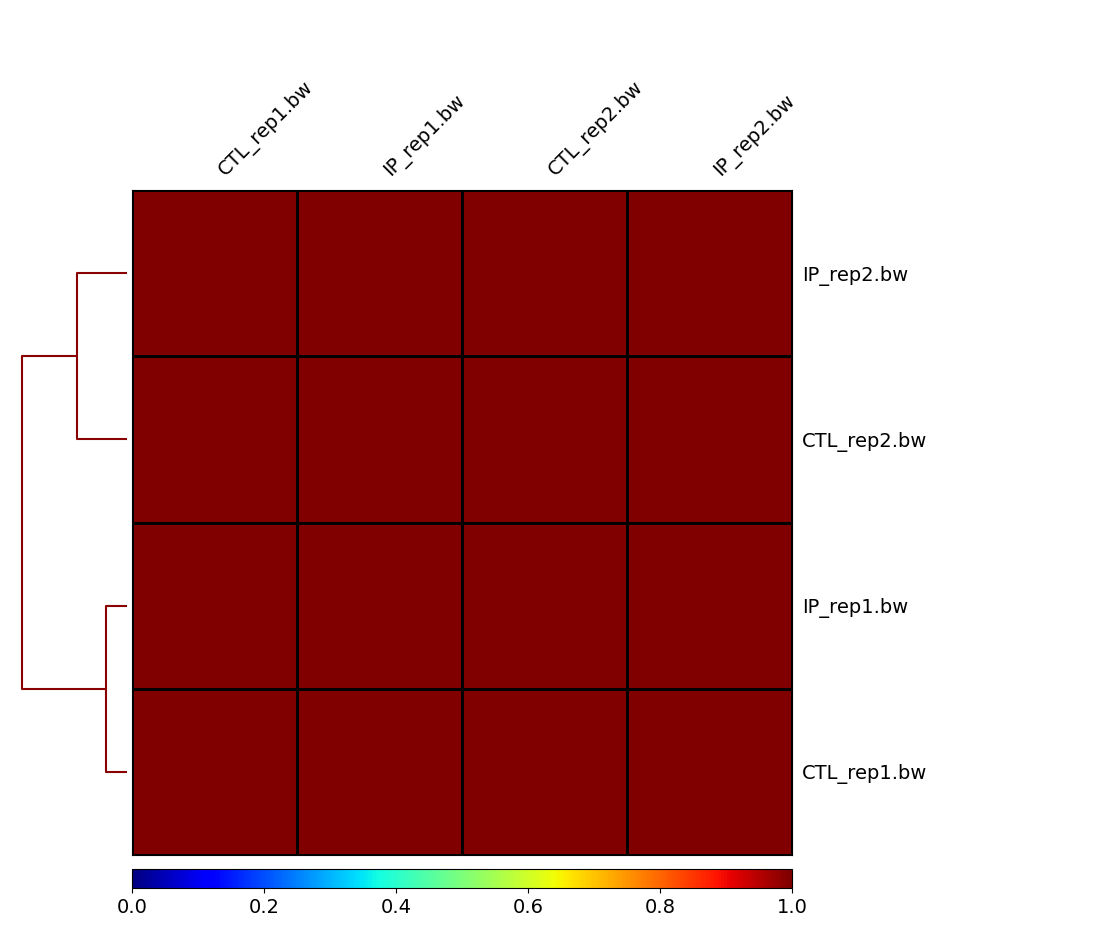

The heatmap generated above shows the correlation of sequencing read distribution across different samples in the ChIP-seq dataset. 
- Axes: Both the x-axis and y-axis represent the same set of samples, with each cell in the heatmap represents the correlation between the sample on the x-axis and the y-axis.
- Color Scale: The color scale from blue to red indicates the range of correlation values from low (0.0) to high (1.0). In this heatmap, all cells seems to be in the darker red shade, whcih suggests high correlation values close to 1.0.
- High Correlation Values: The dark red color across all intersections suggests that all samples both IPs and CTLs, are highly correlated with each other. This cans suggest that the experimental and sequencing conditions were very consistent. This is usually a positive sign, which indicates reliable and reproducible data collection methods.

# Fingerprint plot

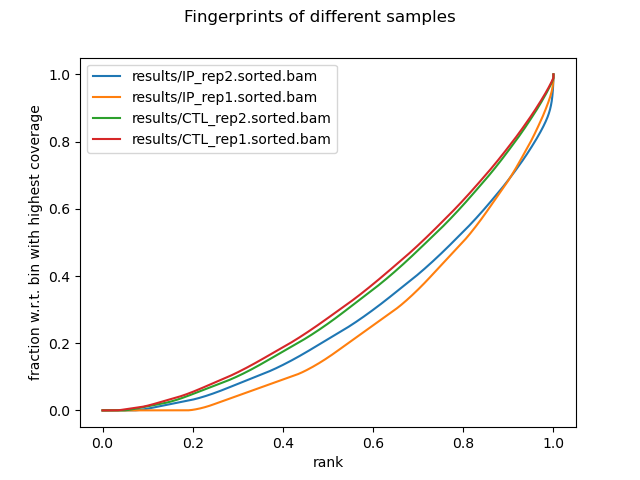


The fingerprint plot  visualizes the distribution of sequencing reads across the genome for different samples (IP and CTL replicates) from the ChIP-seq experiment.
- The x-axis ("rank") represents genomic bins ranked by increasing density of reads, and the y-axis ("fraction with highest coverage") indicates the cumulative fraction of reads. The plot shows how evenly or unevenly reads are distributed throughout the genome.

- TThe fingerprint plot shows distinct patterns between the immunoprecipitation (IP) and control (CTL) samples. 
- The IP samples show increased genomic coverage in regions with high activity, which aligns with the expectations for ChIP-seq experiments targeting specific protein-DNA interactions.
- But in the control samples lesser enrichment is shown ,which is common for controls where no targeted interactions are anticipated.


- All the curves are smooth, which indicates that the sequencing was consistent and free of technical issues.
- The similarity in patterns within each type of sample (IP or control) shows that experiment was reproducible.
- The clear difference between the IP and control samples towards the densest regions suggests that the immunoprecipitation was effective, capturing more of the specific interactions in IP samples.
- The consistency across different replicates suggests that the sequencing and sample preparation were done correctly.
- The little overlap between the types of samples suggests clean separation in the experiment, minimizing any mix-up or contamination.


In [3]:
import pandas as pd

# Create a DataFrame
data = {'Sample': ['IP_rep1', 'IP_rep2', 'Reproducible peaks', 'Filtered blacklisted reproducible peaks'],
        'Peaks': [19139, 42162, 17394, 17069]}

df = pd.DataFrame(data)
df


,Sample,Peaks
0,IP_rep1,19139
1,IP_rep2,42162
2,Reproducible peaks,17394
3,Filtered blacklisted reproducible peaks,17069


The strategy i used in reproducible peaks was Overlap Method which involves finding peaks that overlap in genomic coordinates between replicates. Using Tools called bedtools intersect.

# Motif finding

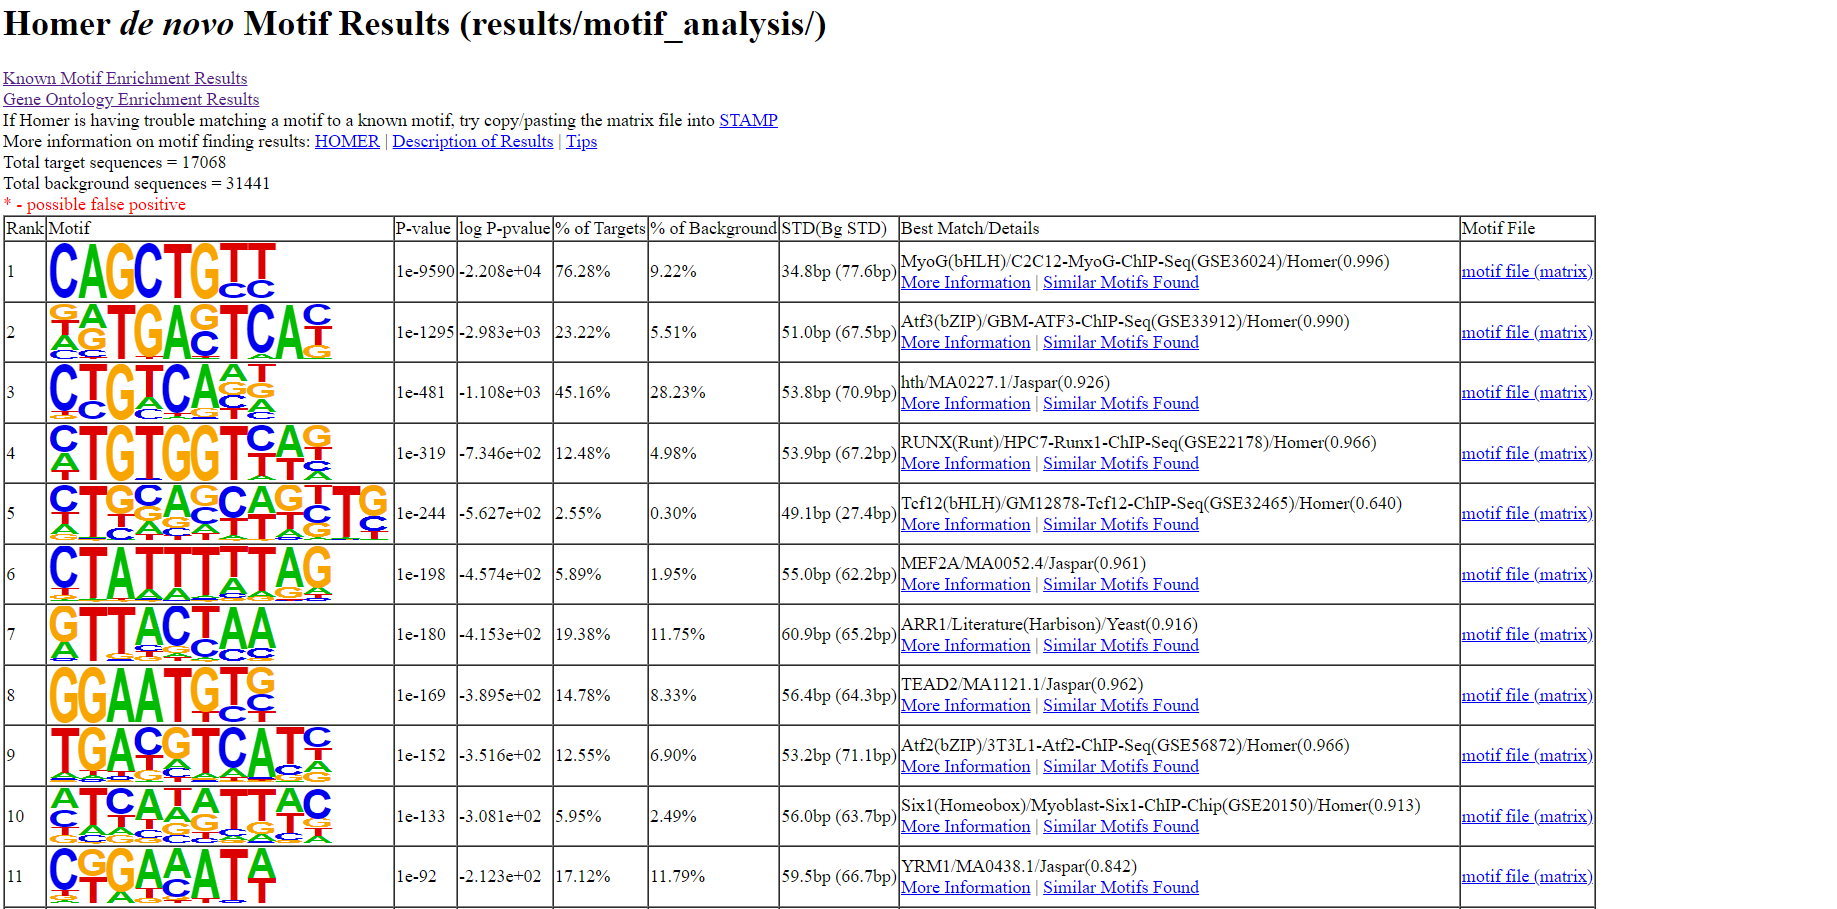

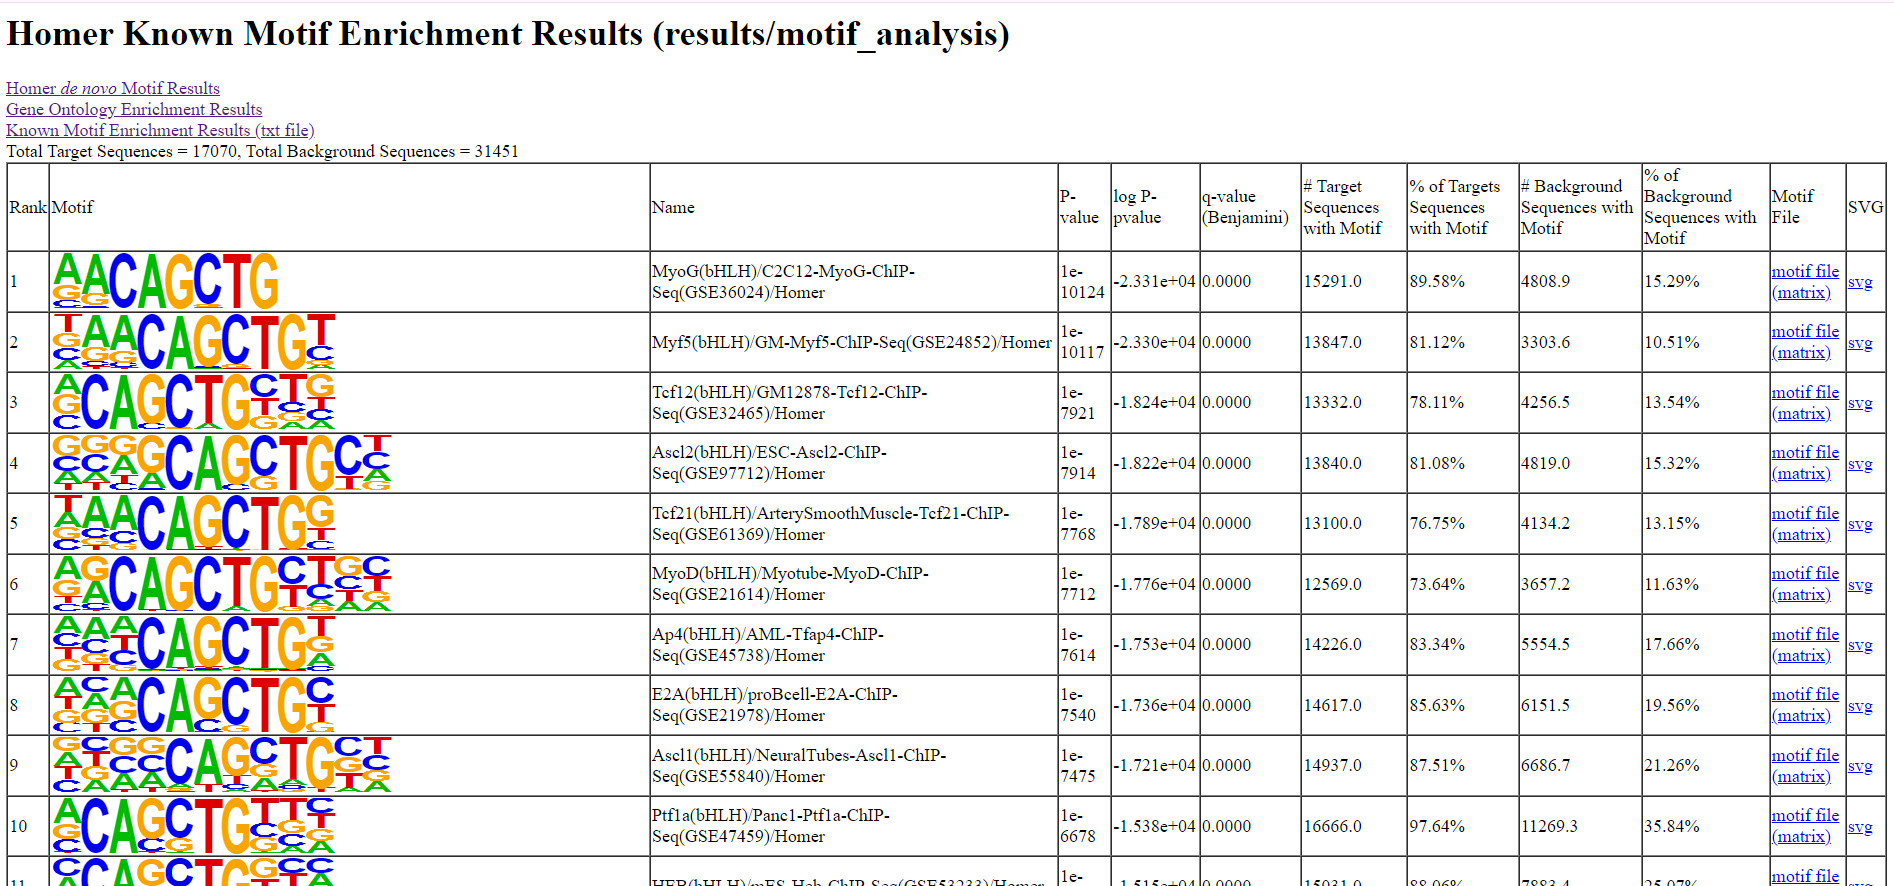

# Motif Analysis Results


- This motif analyis analyse several DNA- binding motifs that are present in the peaks as compared to background sequences. The motifs are represented in sequence logos, highlighting the base preference at each position within the motif.
- The top motif corresponds to the MyoG (bHLH) binding site, indicating a very high enrichment (lowest P-value and significant q-value) and a high percentage of target sequences containing this motif (89.58% of targets). This suggests a strong, specific binding affinity of the factor of interest to this motif.
- The analysis shows the percentage of target and background sequences containing each motif. high percentages in target sequences, as shown in the top motifs, indicate specific interactionswhich can be occur by the biological function of the transcription factor.

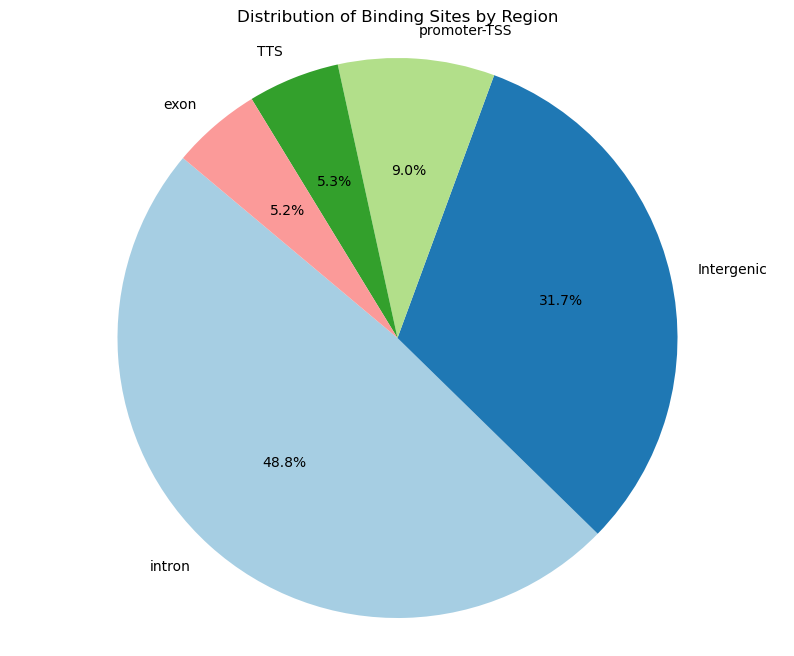

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('annotated_peaks.txt', sep='\t')  

# Extract the general region from the 'Annotation' column
data['Region'] = data['Annotation'].apply(lambda x: x.split()[0])

# Count the occurrences of each region type
region_counts = data['Region'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(region_counts))))
plt.axis('equal')  
plt.title('Distribution of Binding Sites by Region')
plt.show()
